# Imports

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time
import glob
import os
import sys
import cv2
import math
from threading import Thread

from myAgent import CarlaAgent
from simSync import SimulatorSynchronous

try:
    sys.path.append(glob.glob('./carla-*%d.%d-%s.egg' % (
        sys.version_info.major,
        sys.version_info.minor,
        'win-amd64' if os.name == 'nt' else 'linux-x86_64'))[0])
except IndexError:
    pass

import carla

## Synchronous with old agent

```
myAgent = CarlaAgent()

settings = myAgent.world.get_settings()

settings.fixed_delta_seconds = 1/15      # rendering interval
settings.substepping = True              # physics sub-stepping
settings.max_substep_delta_time = 0.01
settings.max_substeps = 10 
settings.synchronous_mode = True         # Enables synchronous mode

myAgent.world.apply_settings(settings)

for i in range(10000):
    myAgent.world.tick()
    time.sleep(1/15)
```

# New Synchronous Simulation

In [3]:
# starting carla server
os.system('cmd /k "\"F:\Autonomous Vehicles\CARLA-SImulator\CARLA_0.9.11_windows\CarlaUE4.exe\" -carla-port=2000 -quality-level=Epic"')

0

In [4]:
simsim = SimulatorSynchronous(fps=15, no_agents=16, port=2000)

simsim.spawn_agents()

Establishing Connection to Server
Probably connected not sure tho
Vehicle 0 spawned
Vehicle 1 spawned
Vehicle 2 spawned
Vehicle 3 spawned
Vehicle 4 spawned
Vehicle 5 spawned
Vehicle 6 spawned
Vehicle 7 spawned
Vehicle 8 spawned
Vehicle 9 spawned
Vehicle 10 spawned
Vehicle 11 spawned
Vehicle 12 spawned
Vehicle 13 spawned
Vehicle 14 spawned
Vehicle 15 spawned


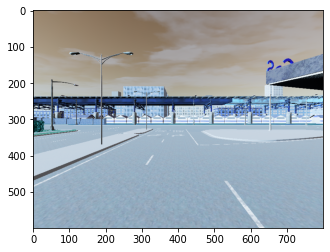

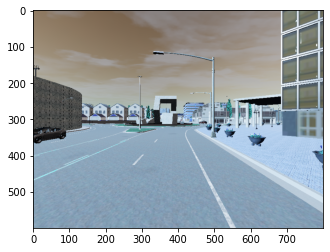

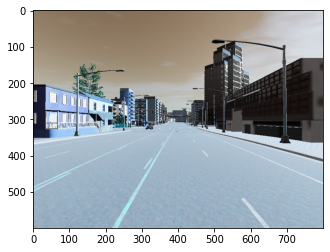

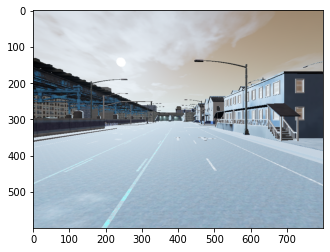

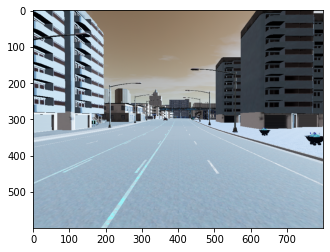

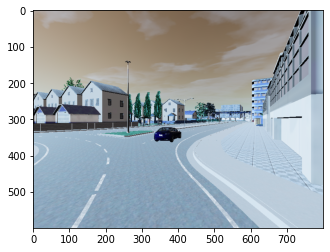

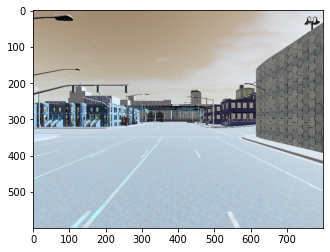

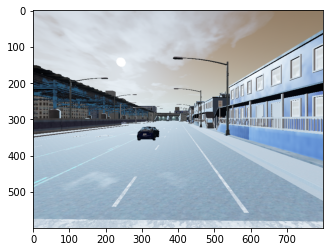

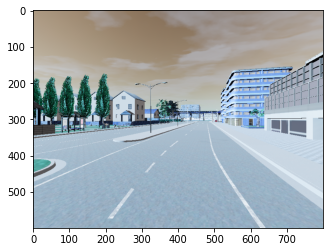

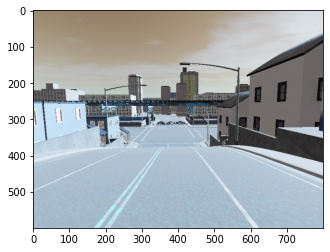

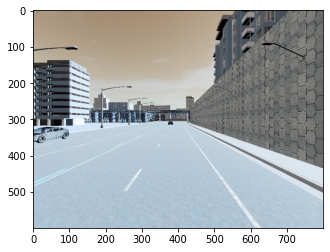

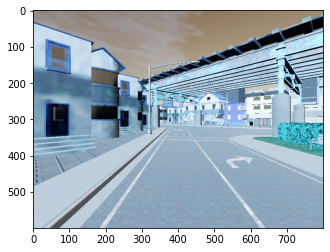

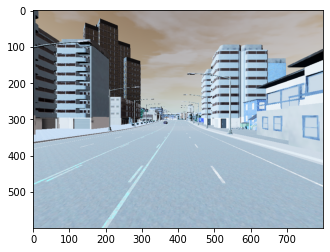

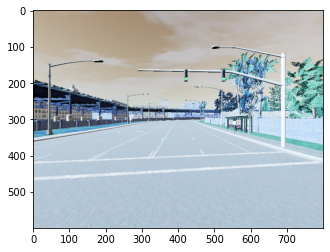

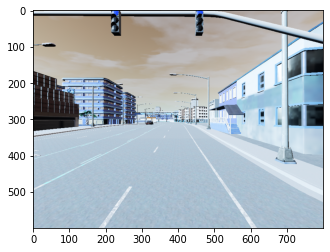

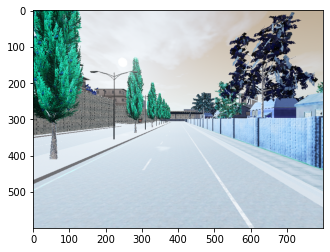

In [5]:
simsim.world.tick()
for i in range(16):
    plt.figure(), plt.imshow(simsim.agent[i].image)

In [6]:
simulation_time = 30


for i in range(simsim.no_agents):
    simsim.agent[i].vehicle.set_autopilot(True)

simulated_frames = 0
t0 = time.time()

while (time.time() - t0 < simulation_time):
    simsim.world.tick()

    simulated_frames += 1

print("loop finished")

for i in range(simsim.no_agents):
    simsim.agent[i].vehicle.set_autopilot(False)


simsim.world.tick()

print("FPS: " + str(simulated_frames/simulation_time))

loop finished
FPS: 12.833333333333334


## Terminate

In [7]:
simsim.terminate()
simsim.world.tick()

destroying actors
terminated


7654

# Threading test

In [2]:
def thread_run(port_no):
    
    simsim = SimulatorSynchronous(fps=15, no_agents=8, port=port_no)
    simsim.spawn_agents()
    
    simulation_time = 30
    
    for i in range(simsim.no_agents):
        simsim.agent[i].vehicle.set_autopilot(True)
        
    simulated_frames = 0
    t0 = time.time()
    
    while (time.time() - t0 < simulation_time):
        simsim.world.tick()
        simulated_frames += 1

    print("loop finished")

    for i in range(simsim.no_agents):
        simsim.agent[i].vehicle.set_autopilot(False)

    simsim.terminate()
    simsim.world.tick()

    print("FPS: " + str(simulated_frames/simulation_time))

In [3]:
os.system('cmd /k "\"F:\Autonomous Vehicles\CARLA-SImulator\CARLA_0.9.11_windows\CarlaUE4.exe\" -carla-port=2000 -quality-level=Epic"')
os.system('cmd /k "\"F:\Autonomous Vehicles\CARLA-SImulator\CARLA_0.9.11_windows\CarlaUE4.exe\" -carla-port=2020 -quality-level=Epic"')
os.system('cmd /k "\"F:\Autonomous Vehicles\CARLA-SImulator\CARLA_0.9.11_windows\CarlaUE4.exe\" -carla-port=2040 -quality-level=Epic"')
os.system('cmd /k "\"F:\Autonomous Vehicles\CARLA-SImulator\CARLA_0.9.11_windows\CarlaUE4.exe\" -carla-port=2060 -quality-level=Epic"')

0

In [4]:
n_thread, args_set = 4, [(2000,), (2020,), (2040,), (2060,)]

threads = [Thread(target=thread_run, args=args_set[i]) for i in range(n_thread)]

[t.start() for t in threads]

[t.join() for t in threads]

Establishing Connection to ServerEstablishing Connection to Server
Establishing Connection to Server

Establishing Connection to Server
Probably connected not sure tho
Probably connected not sure thoProbably connected not sure tho

Probably connected not sure tho
Vehicle 0 spawned
Vehicle 0 spawned
Vehicle 0 spawned
Vehicle 0 spawned
Vehicle 1 spawned
Vehicle 1 spawned
Vehicle 1 spawned
Vehicle 2 spawned
Vehicle 1 spawned
Vehicle 2 spawned
Vehicle 2 spawned
Vehicle 3 spawned
Vehicle 2 spawned
Vehicle 3 spawned
Vehicle 3 spawned
Vehicle 3 spawned
Vehicle 4 spawned
Vehicle 4 spawned
Vehicle 4 spawned
Vehicle 4 spawned
Vehicle 5 spawned
Vehicle 5 spawned
Vehicle 5 spawned
Vehicle 5 spawned
Vehicle 6 spawned
Vehicle 6 spawned
Vehicle 6 spawned
Vehicle 6 spawned
Vehicle 7 spawned
Vehicle 7 spawned
Vehicle 7 spawned
Vehicle 7 spawned
loop finished
destroying actors
terminated
FPS: 9.2
loop finished
destroying actors
terminated
FPS: 8.566666666666666
loop finished
loop finished
destroying act

[None, None, None, None]